In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

T=1
sigma0=0.7
alpha=0.2
m=100
n=1000

Monte Carlo integration using antithetic variaties method

In [3]:
def integral_ant(T, sigma0, alpha, m):
    s_all = np.random.uniform(0, T, 2 * m)
    s = s_all[:m]
    s_antithetic = T - s_all[m:]
    sigma = sigma0 * np.exp(-0.5 * (alpha**2) * s + alpha * np.sqrt(s) * np.random.normal(0, 1, m))
    sigma_antithetic = sigma0 * np.exp(-0.5 * (alpha**2) * s_antithetic + alpha * np.sqrt(s_antithetic) * np.random.normal(0, 1, m))

    integral_ant = np.sum(sigma**2 + sigma_antithetic**2) * T / (2 * m)

    return integral_ant

In [4]:
integral_values_ant = []
for i in range(n):
    result_ant = integral_ant(T, sigma0, alpha, m)  
    integral_values_ant.append(result_ant)  

sq_fair_varswap_ant = np.sqrt(np.mean(integral_values_ant))  

fair_volswap_ant = np.mean(np.sqrt(integral_values_ant))

conv_adj_num_ant = np.mean((integral_values_ant-np.mean(integral_values_ant))**2)
conv_adj_den_ant = -8*(np.sqrt(np.mean(integral_values_ant)))**3

error =abs(fair_volswap_ant-sq_fair_varswap_ant-conv_adj_num_ant/conv_adj_den_ant)

Brockhaus-Long convexity approximation: $\frac{E\left[\int^{T}_{0}\sigma^{2}_{s}ds-E\int^{T}_{0}\sigma^{2}_{s}ds\right]^{2}}{8\left(\sqrt{E\int^{T}_{0}\sigma^{2}_{s}ds}\right)^{3}}$

In [5]:
table = [['Volswap fair value', 'Square root of varswap fair value', "Difference","BL Convexity adjustment","Error"], 
         [fair_volswap_ant, sq_fair_varswap_ant,fair_volswap_ant-sq_fair_varswap_ant,conv_adj_num_ant/conv_adj_den_ant,error]]
print(tabulate(table,headers="firstrow"))


  Volswap fair value    Square root of varswap fair value    Difference    BL Convexity adjustment        Error
--------------------  -----------------------------------  ------------  -------------------------  -----------
            0.707654                              0.70769  -3.62234e-05               -3.62536e-05  3.02611e-08


C:\Users\Ricard Punsola Soler\AppData\Local\Temp\ipykernel_24376\3058460426.py:18: RuntimeWarning: invalid value encountered in double_scalars
  error = abs(fair_volswap_ant - sq_fair_varswap_ant - conv_adj_num_ant / conv_adj_den_ant)


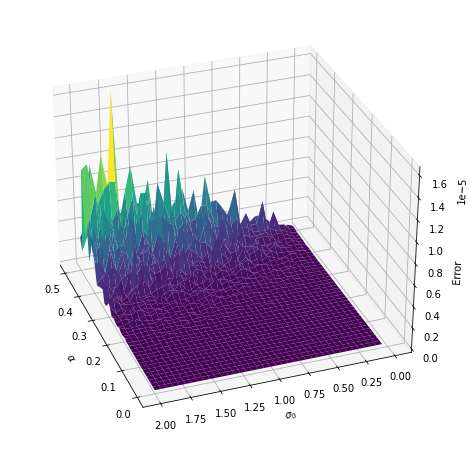

In [6]:
sigma0_values = np.linspace(0, 2, 40)
alpha_values = np.linspace(0, 0.5, 40)
error_matrix = np.zeros((len(sigma0_values), len(alpha_values)))

for i, sigma0 in enumerate(sigma0_values):
    for j, alpha in enumerate(alpha_values):
        integral_values_ant = []
        for k in range(n):
            result_ant = integral_ant(T, sigma0, alpha, m)
            integral_values_ant.append(result_ant)

        sq_fair_varswap_ant = np.sqrt(np.mean(integral_values_ant))
        fair_volswap_ant = np.mean(np.sqrt(integral_values_ant))
        mean_integral_ant = np.mean(integral_values_ant)
        conv_adj_num_ant = np.mean((integral_values_ant - mean_integral_ant) ** 2)
        conv_adj_den_ant = -8 * (np.sqrt(mean_integral_ant)) ** 3

        error = abs(fair_volswap_ant - sq_fair_varswap_ant - conv_adj_num_ant / conv_adj_den_ant)

        error_matrix[i, j] = error

alpha_grid, sigma0_grid = np.meshgrid(alpha_values, sigma0_values)
fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_grid, sigma0_grid, error_matrix, cmap='viridis')
ax.view_init(elev=30, azim=160)  
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\sigma_{0}$')
ax.set_zlabel('Error')
ax.set_title('')

plt.show()